# Term2 Sprint24 授業課題 
## コーディング課題：ゲート付きRNN

Kerasには複数のRecurrentレイヤーが用意されている。  
今回のSprintではこれら全てを動かし、それらを理解し区別できる状態を目指す。

以下のドキュメントにまとめられている。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/ "Recurrentレイヤー - Keras Documentation")

次の11個の項目がある。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

## 1. 各種手法の実行
Keras公式のサンプルをスタートコードとする。これを元に、上記11個の項目全てを使用する。

例えばこの中でSimpleRNNとLSTMなどは並列関係であり、精度の比較が行える。  
そういった関係を見つけて比較をする。

なおConvLSTM2Dのみ2次元配列を受け付ける手法であり、他と単純な精度の比較はできない。

**LSTMのサンプルコード**

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py "keras/imdb_lstm.py at master · keras-team/keras")

**ConvLSTM2Dのサンプルコード**

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py "keras/conv_lstm.py at master · keras-team/keras")

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構わない。  
全て実行する上での実行時間を考慮した数に設定する。

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## SimpleRNN

In [1]:
from __future__ import print_function

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')


# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old


print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# SimpleRNN
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


W0626 06:03:19.692578 140333540378496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 06:03:19.709597 140333540378496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 06:03:19.712443 140333540378496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 06:03:19.758639 140333540378496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0626 06:03:19.767077 

x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...


W0626 06:03:19.894671 140333540378496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6910 - acc: 0.5373 - val_loss: 0.6649 - val_acc: 0.5760
Epoch 2/3
25000/25000 [==============================] - 30s 1ms/step - loss: 0.6064 - acc: 0.6614 - val_loss: 0.5812 - val_acc: 0.6954
Epoch 3/3
25000/25000 [==============================] - 6s 226us/step
Test score: 0.5125431495285034
Test accuracy: 0.7624


## RNN + SimpleRNNCell

In [2]:
from keras.layers import RNN, SimpleRNNCell

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# RNN + SimpleRNNCell
cell = SimpleRNNCell(128, dropout=0.2, recurrent_dropout=0.2)
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6915 - acc: 0.5318 - val_loss: 0.6583 - val_acc: 0.5971
Epoch 2/3
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5633 - acc: 0.7098 - val_loss: 0.4817 - val_acc: 0.7791
Epoch 3/3
25000/25000 [==============================] - 6s 225us/step
Test score: 0.5144165652275086
Test accuracy: 0.75556


## GRU

In [4]:
from keras.layers import GRU

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# GRU
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 96s 4ms/step - loss: 0.4883 - acc: 0.7602 - val_loss: 0.3699 - val_acc: 0.8372
Epoch 2/3
25000/25000 [==============================] - 93s 4ms/step - loss: 0.2897 - acc: 0.8812 - val_loss: 0.3576 - val_acc: 0.8449
Epoch 3/3
25000/25000 [==============================] - 16s 658us/step
Test score: 0.3946078871917725
Test accuracy: 0.83012


## RNN + GRUCell

In [5]:
from keras.layers import RNN, GRUCell

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# RNN + GRUCell
cell = GRUCell(128, dropout=0.2, recurrent_dropout=0.2)
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 93s 4ms/step - loss: 0.4753 - acc: 0.7718 - val_loss: 0.3684 - val_acc: 0.8389
Epoch 2/3
25000/25000 [==============================] - 92s 4ms/step - loss: 0.2822 - acc: 0.8853 - val_loss: 0.3569 - val_acc: 0.8458
Epoch 3/3
25000/25000 [==============================] - 17s 665us/step
Test score: 0.41590875967502594
Test accuracy: 0.83856


## LSTM

In [5]:
from keras.layers import LSTM

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# LSTM
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 115s 5ms/step - loss: 0.4624 - acc: 0.7806 - val_loss: 0.4023 - val_acc: 0.8186
Epoch 2/3
25000/25000 [==============================] - 113s 5ms/step - loss: 0.2994 - acc: 0.8773 - val_loss: 0.3817 - val_acc: 0.8310
Epoch 3/3
25000/25000 [==============================] - 21s 824us/step
Test score: 0.4041218823814392
Test accuracy: 0.83276


## RNN + LSTMCell

In [6]:
from keras.layers import RNN, LSTMCell

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# RNN + LSTMCell
cell = LSTMCell(128, dropout=0.2, recurrent_dropout=0.2)
model.add(RNN(cell))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 115s 5ms/step - loss: 0.4596 - acc: 0.7829 - val_loss: 0.3755 - val_acc: 0.8368
Epoch 2/3
25000/25000 [==============================] - 116s 5ms/step - loss: 0.2952 - acc: 0.8811 - val_loss: 0.4041 - val_acc: 0.8171
Epoch 3/3
25000/25000 [==============================] - 21s 855us/step
Test score: 0.3992274554347992
Test accuracy: 0.83324


## RNN + StackedRNNCells(GRUCell)

In [8]:
from keras.layers import RNN, GRUCell

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# RNN + LSTMCells
cells = [GRUCell(128, dropout=0.2, recurrent_dropout=0.2),
         GRUCell(128, dropout=0.2, recurrent_dropout=0.2),
         GRUCell(128, dropout=0.2, recurrent_dropout=0.2)]
model.add(RNN(cells))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 264s 11ms/step - loss: 0.4554 - acc: 0.7824 - val_loss: 0.3855 - val_acc: 0.8300
Epoch 2/3
25000/25000 [==============================] - 257s 10ms/step - loss: 0.2851 - acc: 0.8846 - val_loss: 0.3814 - val_acc: 0.8368
Epoch 3/3
25000/25000 [==============================] - 49s 2ms/step
Test score: 0.42404569808006287
Test accuracy: 0.82876


## RNN + StackedRNNCells(LSTMCell)

In [7]:
from keras.layers import RNN, LSTMCell

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# RNN + LSTMCells
cells = [LSTMCell(128, dropout=0.2, recurrent_dropout=0.2),
         LSTMCell(128, dropout=0.2, recurrent_dropout=0.2),
         LSTMCell(128, dropout=0.2, recurrent_dropout=0.2)]
model.add(RNN(cells))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 310s 12ms/step - loss: 0.4870 - acc: 0.7649 - val_loss: 0.4434 - val_acc: 0.8042
Epoch 2/3
25000/25000 [==============================] - 307s 12ms/step - loss: 0.3350 - acc: 0.8610 - val_loss: 0.4681 - val_acc: 0.7820
Epoch 3/3
25000/25000 [==============================] - 63s 3ms/step
Test score: 0.38428066374778747
Test accuracy: 0.83496


## CuDNNGRU

In [10]:
from keras.layers import CuDNNGRU

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# CuDNNGRU
model.add(CuDNNGRU(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 13s 535us/step - loss: 0.4346 - acc: 0.7936 - val_loss: 0.3565 - val_acc: 0.8422
Epoch 2/3
25000/25000 [==============================] - 9s 379us/step - loss: 0.2420 - acc: 0.9052 - val_loss: 0.3789 - val_acc: 0.8460
Epoch 3/3
25000/25000 [==============================] - 3s 102us/step
Test score: 0.4130000365257263
Test accuracy: 0.83644


## CuDNNLSTM

In [11]:
from keras.layers import CuDNNLSTM

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
# CuDNNLSTM
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 12s 489us/step - loss: 0.4458 - acc: 0.7830 - val_loss: 0.3952 - val_acc: 0.8248
Epoch 2/3
25000/25000 [==============================] - 10s 390us/step - loss: 0.2522 - acc: 0.8994 - val_loss: 0.3936 - val_acc: 0.8361
Epoch 3/3
25000/25000 [==============================] - 3s 105us/step
Test score: 0.43767832983970645
Test accuracy: 0.83012


## ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 53s 56ms/step - loss: 0.2603 - val_loss: 0.0817
Epoch 2/3
950/950 [==============================] - 48s 51ms/step - loss: 0.0262 - val_loss: 0.0185
Epoch 3/3
950/950 [==============================] - 48s 51ms/step - loss: 0.0046 - val_loss: 0.0045


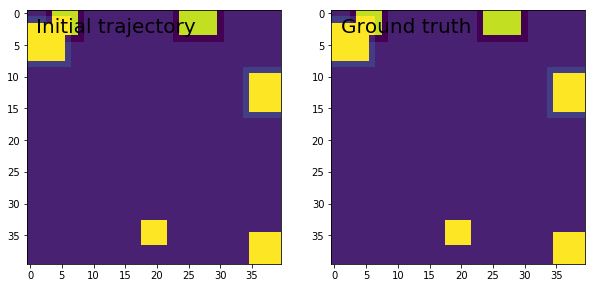

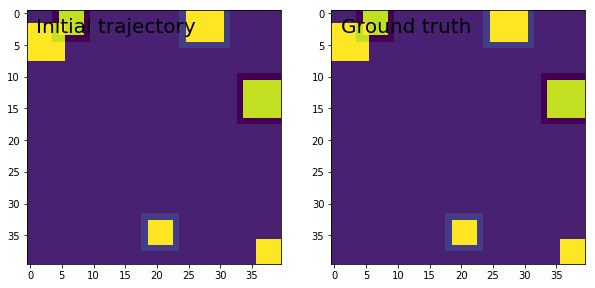

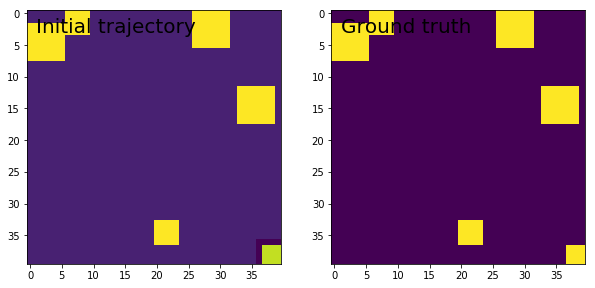

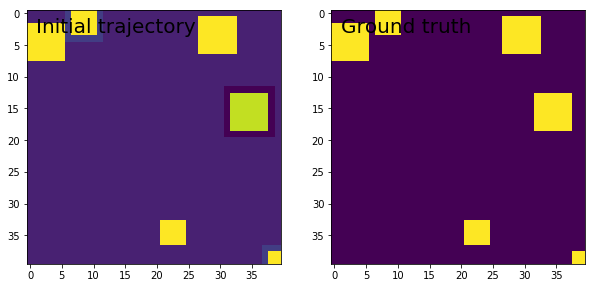

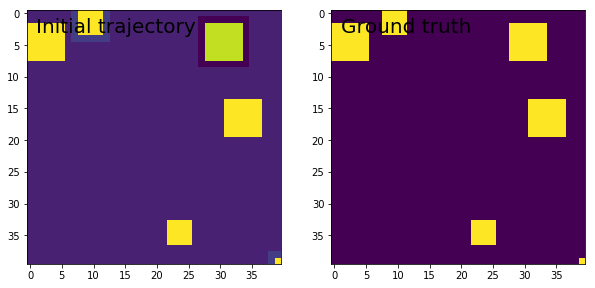

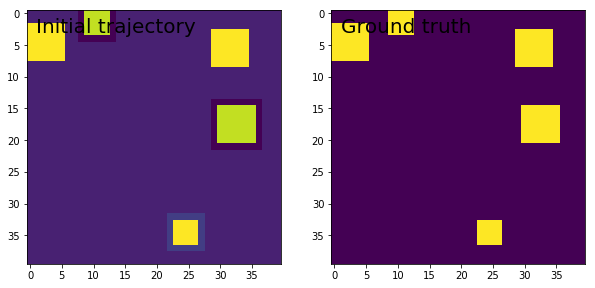

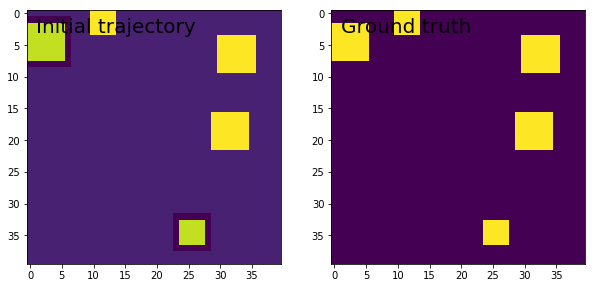

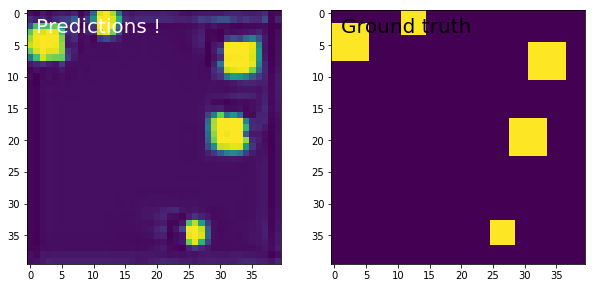

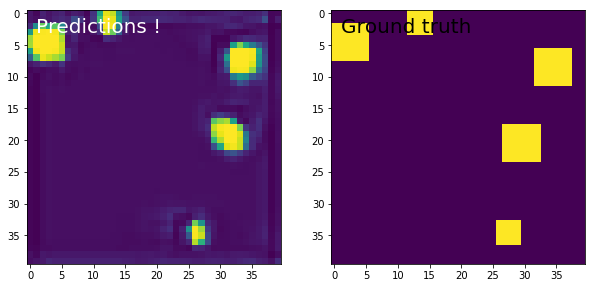

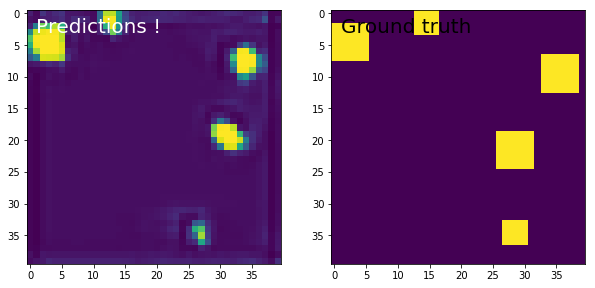

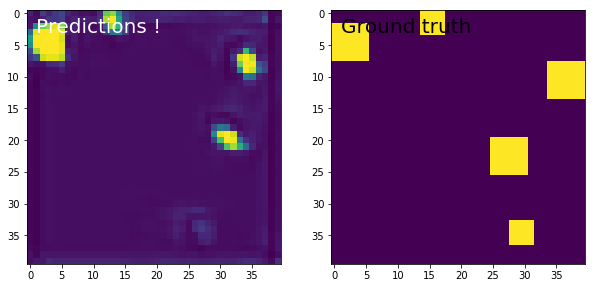

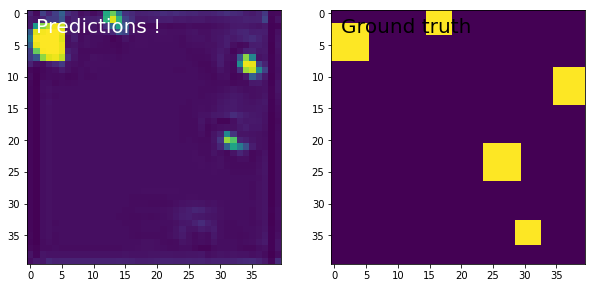

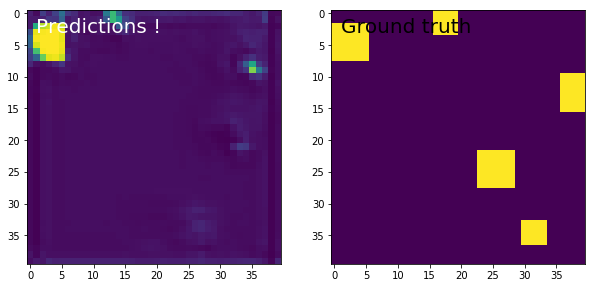

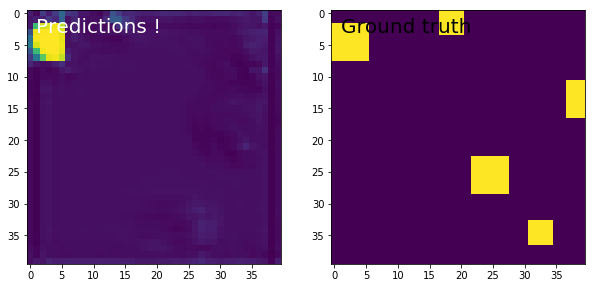

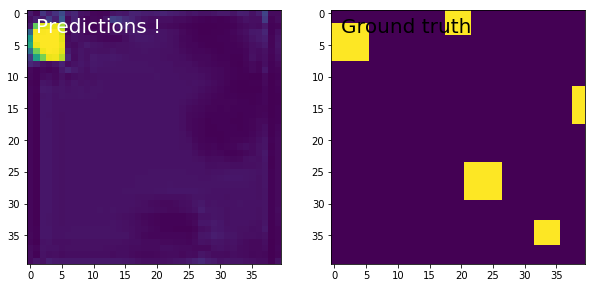

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 2. 比較結果の説明
11の項目それぞれがどういうものなのかを説明する。  
また、比較した結果を表やグラフで載せ、説明する。  
今回は「RNNはそれほど詳しくないがタスクで必要になったためKerasのドキュメントを見た」という仮定を置く。

- RNN
- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

## Comparison of accuracy

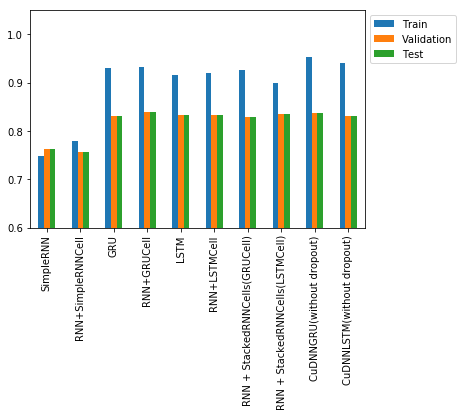

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

columns = ["SimpleRNN","RNN+SimpleRNNCell","GRU","RNN+GRUCell","LSTM",
           "RNN+LSTMCell","RNN + StackedRNNCells(GRUCell)","RNN + StackedRNNCells(LSTMCell)",
          "CuDNNGRU(without dropout)","CuDNNLSTM(without dropout)"]
index = ["Train","Validation","Test"]
train_accuracies = np.array([0.7490,0.7796,0.9304,0.9317,0.9147,0.9201,0.9256,0.8998,0.9532,0.9404]).reshape(1,-1)
val_accuracies = np.array([0.7624,0.7556,0.8301,0.8386,0.8328,0.8332,0.8288,0.8350,0.8364,0.8301]).reshape(1,-1)
test_accuracies = np.array([0.7624,0.75556,0.83012,0.83856,0.83276,0.83324,0.82876,0.83496,0.83644,0.83012]).reshape(1,-1)
accuracies = np.concatenate((train_accuracies, val_accuracies,test_accuracies), axis=0)
df_accuracies = pd.DataFrame(accuracies, columns=columns, index=index)

df_accuracies.T.plot(kind="bar")
plt.legend(bbox_to_anchor=(1,1))
plt.ylim(0.6,1.05)
plt.show()

### RNN
Recurrentレイヤーに対する基底クラス。隠れ層の状態を保持する。
### SimpleRNN
出力が入力にフィードバックされる全結合RNN。
### GRU
ゲート付きリカレントユニット。
### LSTM
長短期記憶ユニット。
### SimpleRNNCell
SimpleRNNのセルクラス。
### GRUCell
ゲート付きリカレントユニットのセルクラス。
### LSTMCell
LSTM層のためのセルクラス。
### StackedRNNCells
RNNセルのスタックの振る舞いを単一のセルのようにするためのラッパー。
### CuDNNGRU
CuDNNを利用した高速なGRU実装。GPU上のみで動作。
### CuDNNLSTM
CuDNNを利用した高速なLSTM実装。GPU上のみで動作。
### ConvLSTM2D
畳み込みLSTM。LSTM層に似ているが，入力変換とリカレント変換が畳み込み。